# TSP

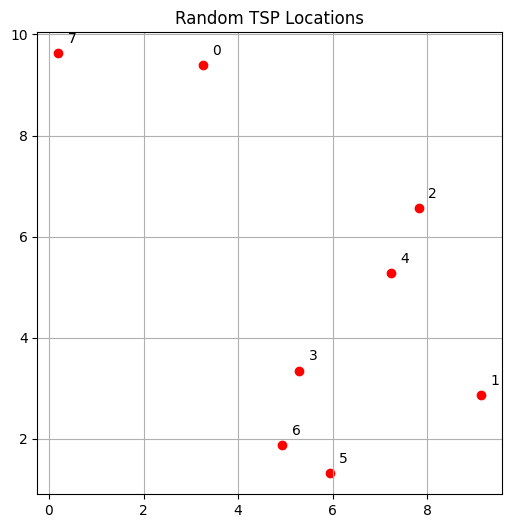

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4242)  # Optional: fix seed for reproducibility
num_locations = 8

# Generate random 2D points between (0,0) and (10,10)
locations = np.random.uniform(0, 10, size=(num_locations, 2))

# Plot random points
plt.figure(figsize=(6,6))
plt.scatter(locations[:,0], locations[:,1], c='red')
for idx, (x, y) in enumerate(locations):
    plt.text(x+0.2, y+0.2, str(idx), fontsize=10)
plt.title('Random TSP Locations')
plt.grid(True)
plt.show()

Route: [0, 7, 3, 6, 5, 1, 2, 4, 0]


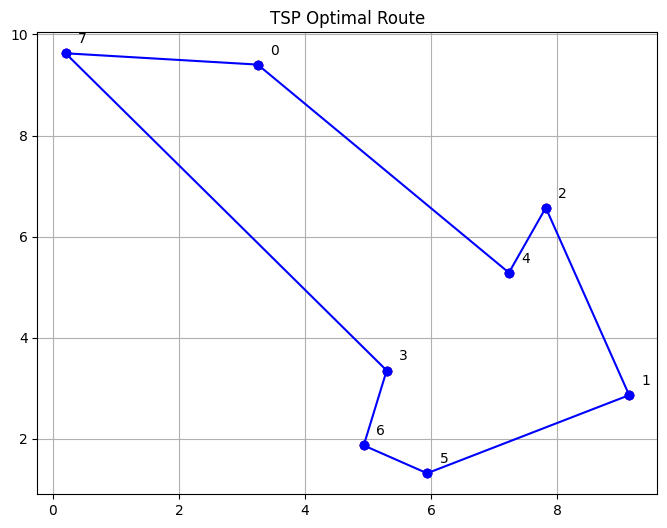

In [2]:
# Imports for OR-Tools
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# Distance matrix function
def compute_euclidean_distance_matrix(locations):
    size = len(locations)
    distance_matrix = {}
    for from_node in range(size):
        distance_matrix[from_node] = {}
        for to_node in range(size):
            if from_node == to_node:
                distance_matrix[from_node][to_node] = 0
            else:
                distance_matrix[from_node][to_node] = int(
                    np.linalg.norm(locations[from_node] - locations[to_node])
                )
    return distance_matrix

# Build distance matrix
distance_matrix = compute_euclidean_distance_matrix(locations)

# Routing setup
manager = pywrapcp.RoutingIndexManager(len(distance_matrix), 1, 0)
routing = pywrapcp.RoutingModel(manager)

# Distance callback
def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Solver parameters
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Solve
solution = routing.SolveWithParameters(search_parameters)

# Extract and plot solution
if solution:
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        index = solution.Value(routing.NextVar(index))
    route.append(manager.IndexToNode(index))  # back to depot
    
    print("Route:", route)
    
    plt.figure(figsize=(8,6))
    for i in range(len(route)-1):
        start = locations[route[i]]
        end = locations[route[i+1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
    plt.scatter(locations[:,0], locations[:,1], c='red')
    for idx, (x, y) in enumerate(locations):
        plt.text(x+0.2, y+0.2, str(idx), fontsize=10)
    plt.title('TSP Optimal Route')
    plt.grid(True)
    plt.show()
else:
    print("No solution found.")
